## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
  Regression is used to predict continuous values while classification handles data into categories or discrete classes.

2. What is a confusion table? What does it help us understand about a model's performance?
  A confusion table helps us understand acciracy, precision, recall. and F1-score by evaluating classification model performance.

3. What does the SSE quantify about a particular model?
  The SSE tells us how far a predicted values is from the actual regression value.

4. What are overfitting and underfitting?
  Overfitting is when the model learns the data too well and captures noise and unimportant patterns. While, underfitting is when the model fails to understand patterns properly causing poor performance in training and test data.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
  Dividing the data between training and testing sets and choosing $k$ to evaluate accuracy allows for the elimination of underfitting or overfitting of data. Instead, we train the models and measure how well it handles new data allowing for the optimal balance to reach generalization.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
  Reporting a class label as a prediction is useful when a specific set decision is required. However, it does not account for uncertainties and tehrefore could skew results when a model is uncertain.
  Reporting probability distribution over class labels is more useful for threshold-based decision. However, compared to class label it is significantly harder to interpret and can cause issues when estimates are not properly adjusted.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [18]:
#1. Load the data, keep only following variables (price, year, mileage)
import pandas as pd

cars_file = "/content/USA_cars_datasets.csv"
cars_df = pd.read_csv(cars_file)

cars_df = cars_df[['price', 'year', 'mileage']]
# See if there are any missing values to handle - no missing values in any of the columns
print("Missing values", cars_df.isna().sum())
cars_df.head()

Missing values price      0
year       0
mileage    0
dtype: int64


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [19]:
# 2. Maxmin normalize year and mileage

from sklearn.preprocessing import MinMaxScaler
# Establish the scaler then scale year and mileage
scaler = MinMaxScaler()
cars_df[['year', 'mileage']] = scaler.fit_transform(cars_df[['year', 'mileage']])
cars_df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [20]:
# 3. Split the data into training and testing
from sklearn.model_selection import train_test_split
x_features = cars_df[['year', 'mileage']]
y_target_vars = cars_df['price']
x_features_train, x_features_test, y_target_vars_train, y_target_vars_test = train_test_split(x_features, y_target_vars, test_size=0.2, random_state=42)
# Check the size of training and test sets
print(f"Training Set Size: {x_features_train.shape[0]} samples")
print(f"Test Set Size: {x_features_test.shape[0]} samples")

Training Set Size: 1999 samples
Test Set Size: 500 samples


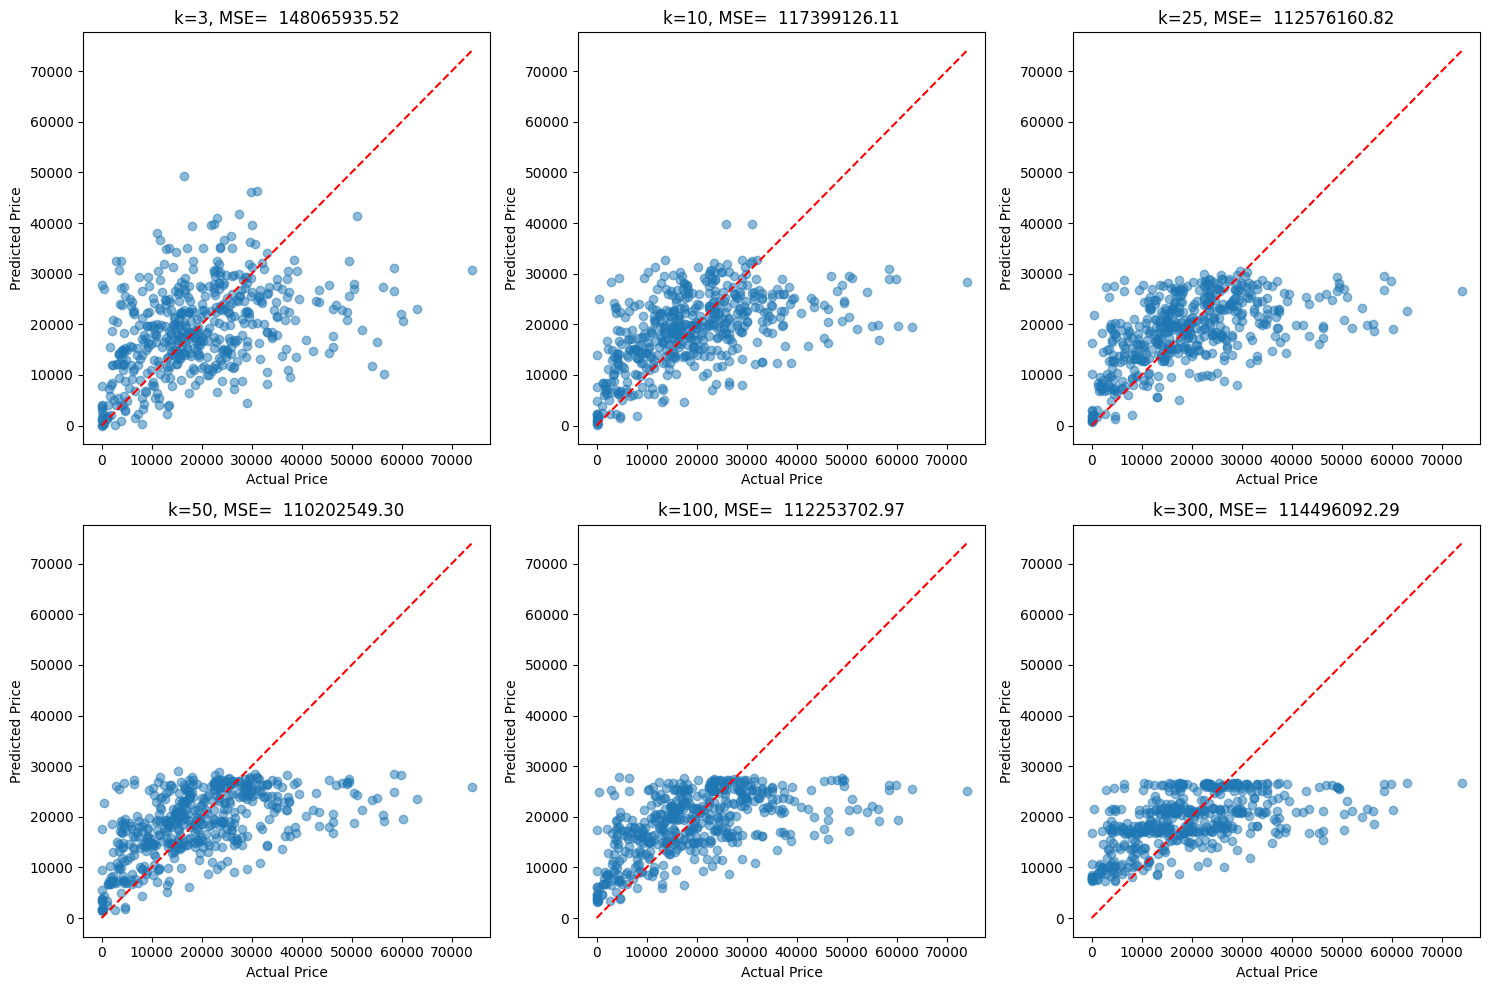

In [24]:
# 4. Implement k-NN Regression for Different Values of k
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3,10, 25, 50, 100, 300]
mse_values = []
plt.figure(figsize=(15,10))
for i, k in enumerate(k_values):
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(x_features_train, y_target_vars_train)
  y_predict = model.predict(x_features_test)
  mse = mean_squared_error(y_target_vars_test, y_predict)
  mse_values.append(mse)
  plt.subplot(2, 3, i+1)
  plt.scatter(y_target_vars_test, y_predict, alpha=0.5)
  plt.plot([y_target_vars_test.min(), y_target_vars_test.max()], [y_target_vars_test.min(), y_target_vars_test.max()], color='red', linestyle="--")
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title(f"k={k}, MSE= {mse: .2f}")
plt.tight_layout()
plt.show()

As k increases, more of the data is captured in a specific area indicating a potential underfitting of the data.

In [23]:
# 5. Determine the optimal k for the dataset
optimal_k_val = k_values[np.argmin(mse_values)]
print(f"Optimal k value: {optimal_k_val}")

Optimal k value: 50


6. As the values in k varied, with a smaller k values we see much more cases of overfitting as the values followed the slope. There we see the data is listening more to noise. As k values increased, the data concentrated in one area horizontal and strayed further away from the slope showing signs of underfitting.

Do One.

Q1. This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:

level - Level of institution (4-year, 2-year)
aid_value - The average amount of student aid going to undergraduate recipients
control - Public, Private not-for-profit, Private for-profit
grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the ./data/college_completion.csv data with Pandas.

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

3. Cross tabulate control and level. Describe the patterns you see.

4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

Dataset Shape: (3798, 63)

Column Names: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first'

<ipython-input-22-655d533315fc>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(college_df['grad_100_value'].dropna(), shade=True)


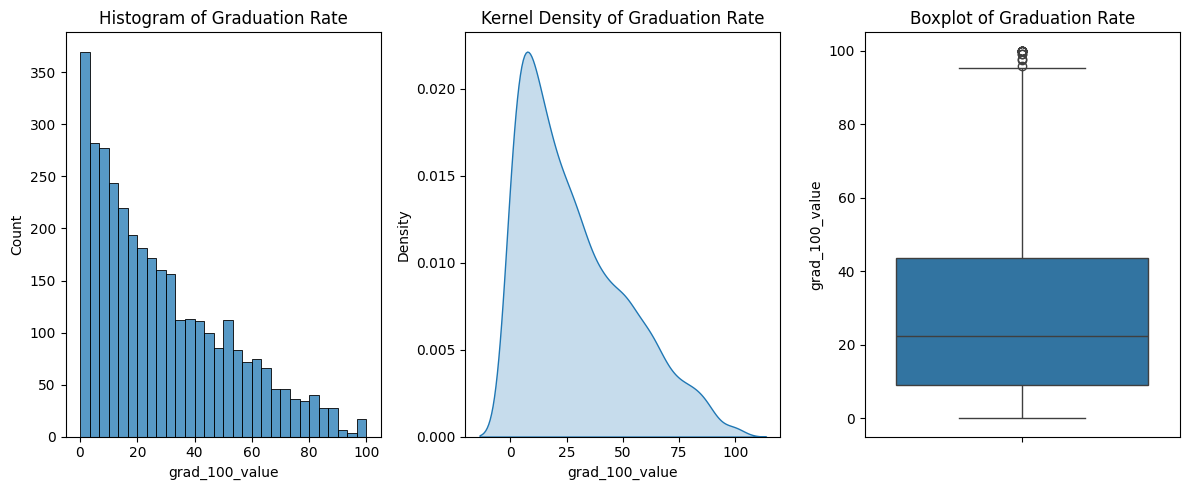


Summary Statistics for Graduation Rate:
 count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


<ipython-input-22-655d533315fc>:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=college_df, x="grad_100_value", hue="control", shade=True)


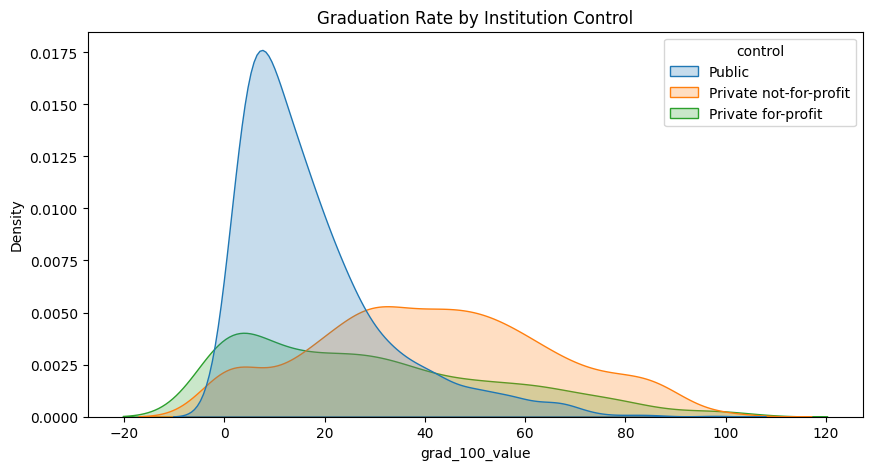

<ipython-input-22-655d533315fc>:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=college_df, x="grad_100_value", hue="level", shade=True)


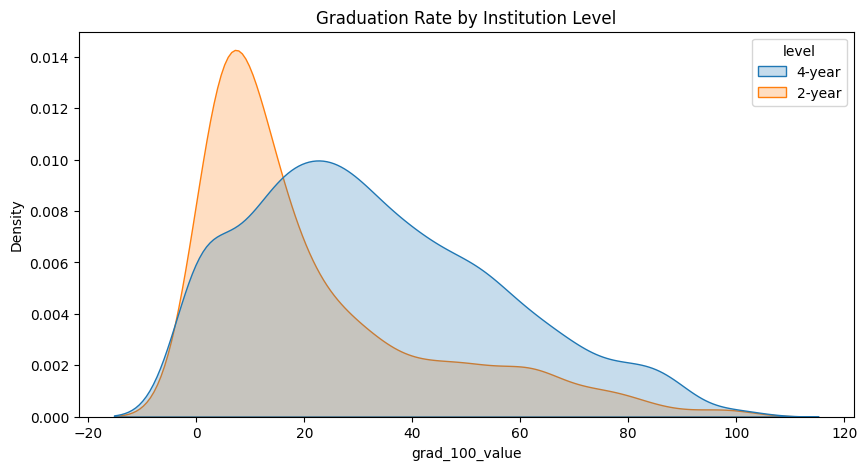


Grouped Statistics by Control:
                          count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Grouped Statistics by Level:
          count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


<ipython-input-22-655d533315fc>:58: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=college_df, x="grad_100_value", hue="levelXcontrol", shade=True)


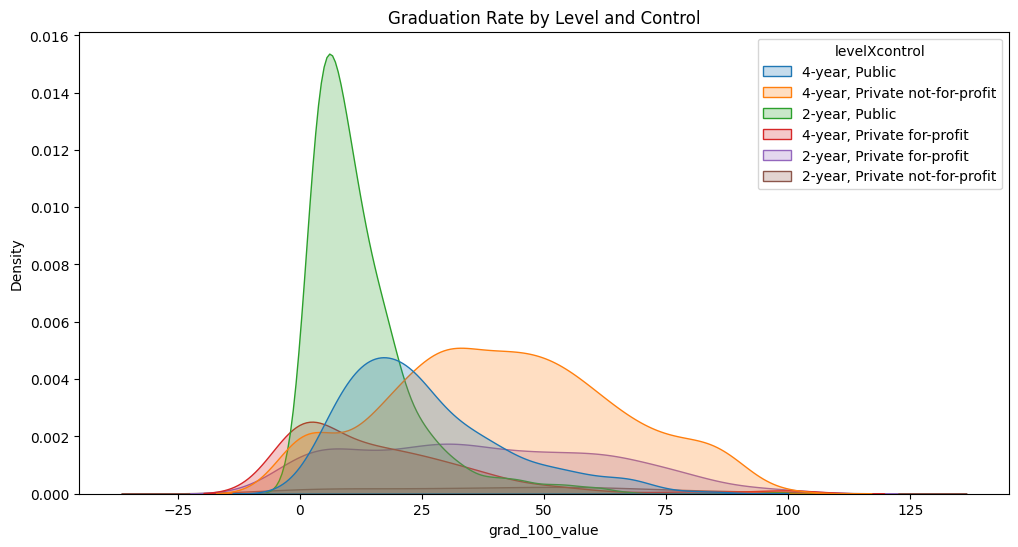

<ipython-input-22-655d533315fc>:64: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(college_df['aid_value'].dropna(), shade=True)


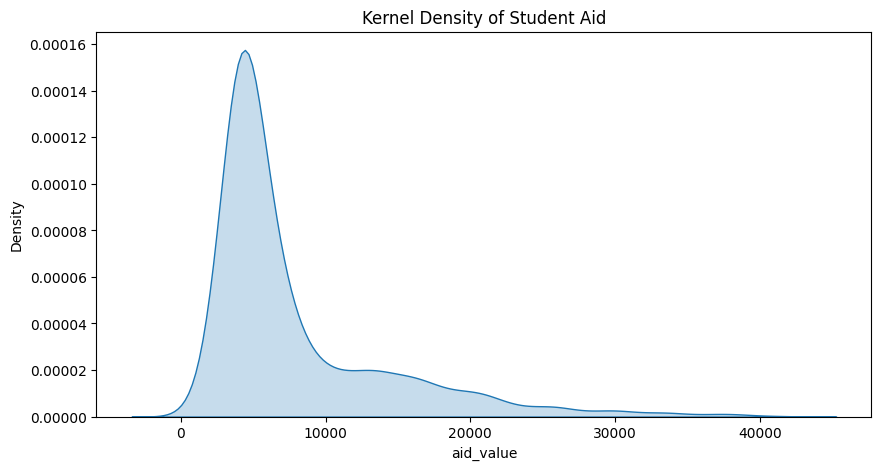

<ipython-input-22-655d533315fc>:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=college_df, x="aid_value", hue="control", shade=True)


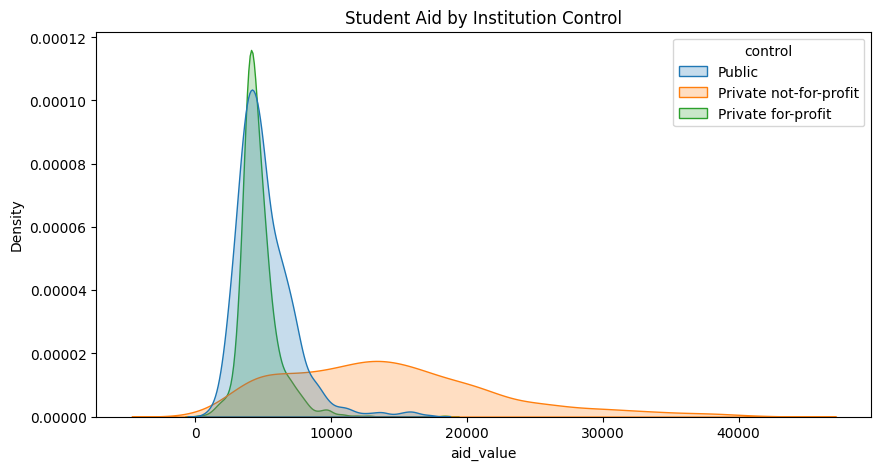

<ipython-input-22-655d533315fc>:74: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=college_df, x="aid_value", hue="level", shade=True)


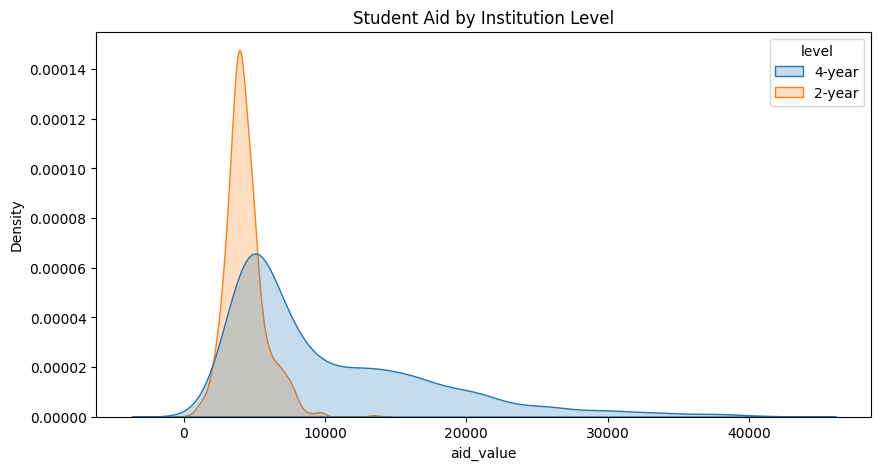


Grouped Statistics for Aid Value by Control:
                          count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  

Grouped Statistics for Aid Value by Level:
          count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7

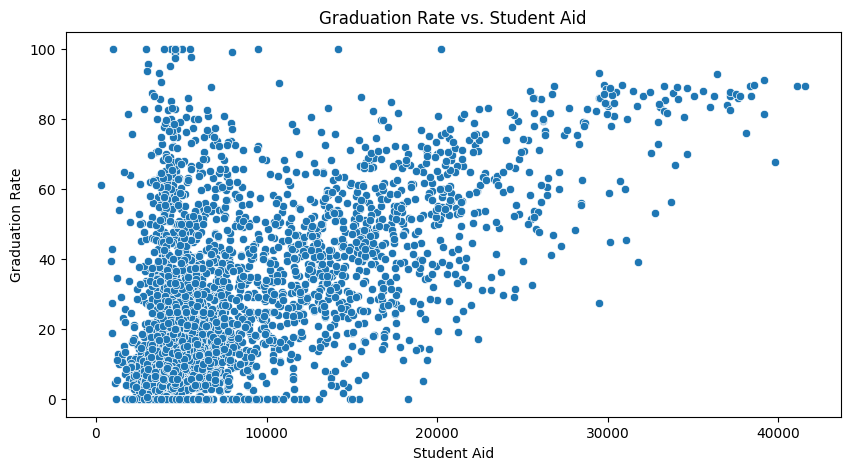

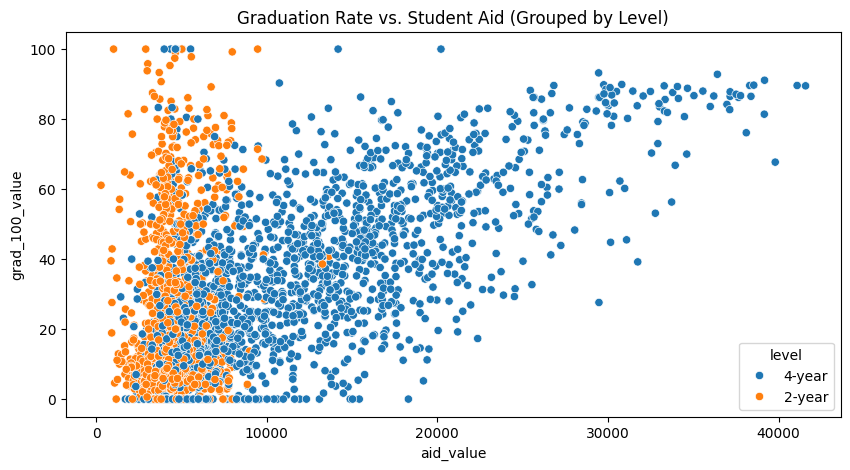

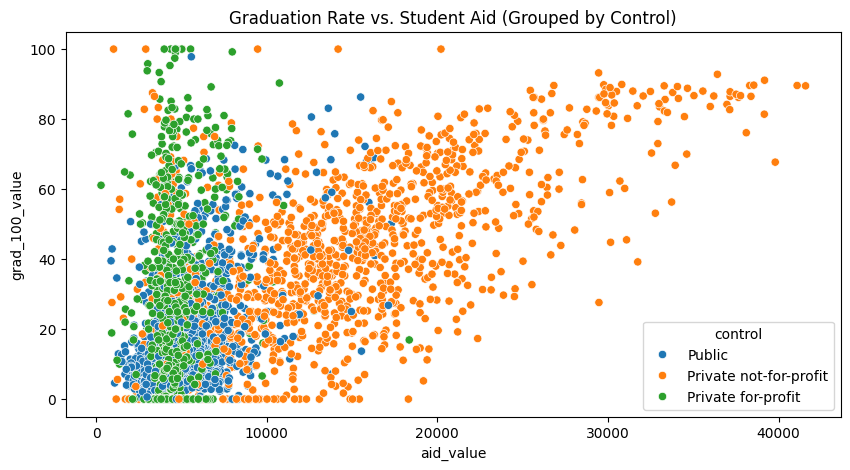

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Data
college_file = "/content/college_completion.csv"
college_df = pd.read_csv(college_file)

# Check dataset dimensions, variables, and first few rows
print("Dataset Shape:", college_df.shape)
print("\nColumn Names:", college_df.columns)
print("\nFirst 5 Rows:\n", college_df.head())

# Step 2: Cross-tabulation of control and level
cross_tab = pd.crosstab(college_df['control'], college_df['level'])
print("\nCross Tabulation:\n", cross_tab)

# Step 3: Histogram, KDE, Boxplot, and Summary Statistics for grad_100_value
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(college_df['grad_100_value'].dropna(), bins=30, kde=False)
plt.title("Histogram of Graduation Rate")

plt.subplot(1, 3, 2)
sns.kdeplot(college_df['grad_100_value'].dropna(), shade=True)
plt.title("Kernel Density of Graduation Rate")

plt.subplot(1, 3, 3)
sns.boxplot(y=college_df['grad_100_value'])
plt.title("Boxplot of Graduation Rate")

plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics for Graduation Rate:\n", college_df['grad_100_value'].describe())

# Step 4: KDE by Control and Level
plt.figure(figsize=(10, 5))
sns.kdeplot(data=college_df, x="grad_100_value", hue="control", shade=True)
plt.title("Graduation Rate by Institution Control")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data=college_df, x="grad_100_value", hue="level", shade=True)
plt.title("Graduation Rate by Institution Level")
plt.show()

# Grouped statistical descriptions
print("\nGrouped Statistics by Control:\n", college_df.groupby('control')['grad_100_value'].describe())
print("\nGrouped Statistics by Level:\n", college_df.groupby('level')['grad_100_value'].describe())

# Step 5: Create Interaction Variable levelXcontrol
college_df['levelXcontrol'] = college_df['level'] + ', ' + college_df['control']

plt.figure(figsize=(12, 6))
sns.kdeplot(data=college_df, x="grad_100_value", hue="levelXcontrol", shade=True)
plt.title("Graduation Rate by Level and Control")
plt.show()

# Step 6: Kernel Density Plot for aid_value
plt.figure(figsize=(10, 5))
sns.kdeplot(college_df['aid_value'].dropna(), shade=True)
plt.title("Kernel Density of Student Aid")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data=college_df, x="aid_value", hue="control", shade=True)
plt.title("Student Aid by Institution Control")
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data=college_df, x="aid_value", hue="level", shade=True)
plt.title("Student Aid by Institution Level")
plt.show()

# Grouped statistics for aid_value
print("\nGrouped Statistics for Aid Value by Control:\n", college_df.groupby('control')['aid_value'].describe())
print("\nGrouped Statistics for Aid Value by Level:\n", college_df.groupby('level')['aid_value'].describe())

# Step 7: Scatterplots for Graduation Rate vs. Aid Value
plt.figure(figsize=(10, 5))
sns.scatterplot(x=college_df['aid_value'], y= college_df['grad_100_value'])
plt.title("Graduation Rate vs. Student Aid")
plt.xlabel("Student Aid")
plt.ylabel("Graduation Rate")
plt.show()

# Scatterplot grouped by level
plt.figure(figsize=(10, 5))
sns.scatterplot(data=college_df, x="aid_value", y="grad_100_value", hue="level")
plt.title("Graduation Rate vs. Student Aid (Grouped by Level)")
plt.show()

# Scatterplot grouped by control
plt.figure(figsize=(10, 5))
sns.scatterplot(data=college_df, x="aid_value", y="grad_100_value", hue="control")
plt.title("Graduation Rate vs. Student Aid (Grouped by Control)")
plt.show()